In [52]:
import pandas as pd


In [53]:
dados = pd.read_csv('tips.csv')

In [54]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [55]:
renomear = {
    'total_bill':'valor_da_conta',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia_da_semana',
    'time':'hora_do_dia',
    'size':'total_de_pessoas'}

In [56]:
gorjetas = dados.rename(columns = renomear)

In [57]:
#visualizacao
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [58]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [59]:
sim_nao = {
    'No':'Não',
    'Yes':'Sim'
}

In [60]:
gorjetas.sobremesa.map(sim_nao)


0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [61]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [62]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [63]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [64]:
dias = {
    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta',
    'Fri':'Sexta'
}

In [65]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)


In [66]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [67]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [68]:
hora = {
    'Dinner':'Jantar',
    'Lunch':'Almoço'
}

In [69]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)


In [70]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


Importando o Seaborn

In [71]:
!pip install seaborn==0.9.0

In [72]:
import seaborn as sns
sns.set_style("darkgrid")

In [73]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\artur\anaconda3\lib\site-packages
Requires: scipy, pandas, matplotlib, numpy
Required-by: 


Valor da Conta e da Gorjeta

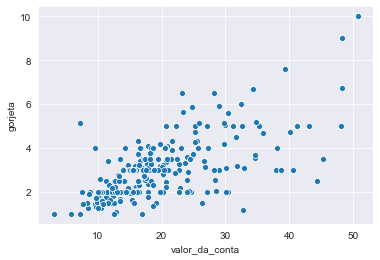

In [74]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta',y='gorjeta',data=gorjetas)

In [75]:
gorjetas.count()

valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

Criando o Campo Porcentagem

In [76]:
gorjetas['porcentagem'] = gorjetas['gorjeta']/gorjetas['valor_da_conta']

In [77]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

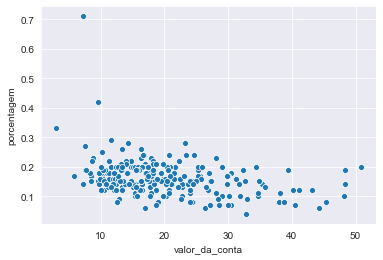

In [78]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

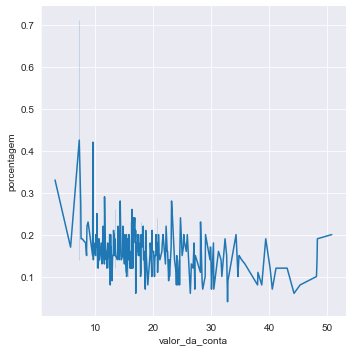

In [79]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta',y='porcentagem',kind='line',data=gorjetas)

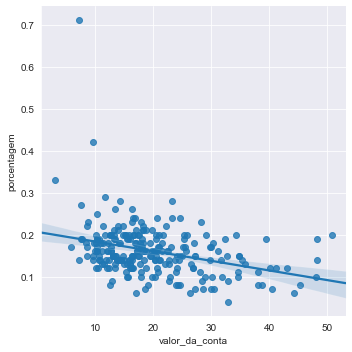

In [80]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

In [81]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [82]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


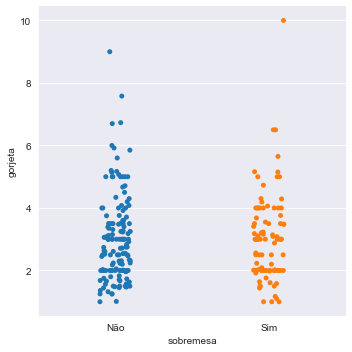

In [83]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)

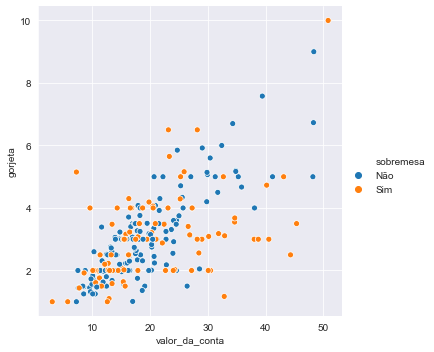

In [84]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',data=gorjetas)

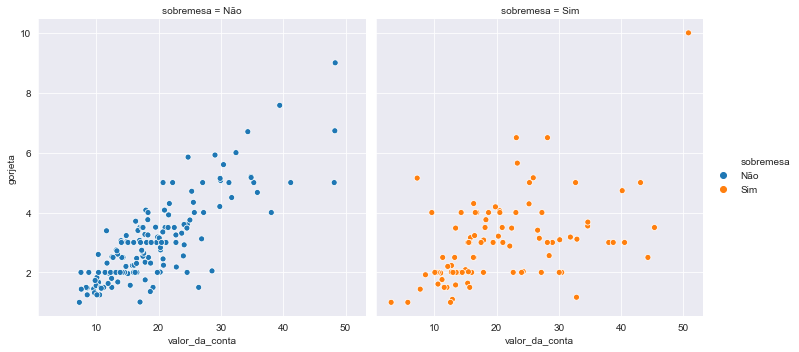

In [85]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',col='sobremesa',data=gorjetas)

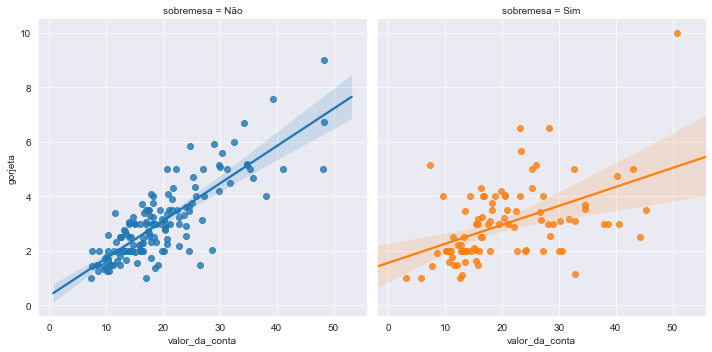

In [86]:
sns.lmplot(x='valor_da_conta',y='gorjeta',col='sobremesa',hue='sobremesa',data=gorjetas)

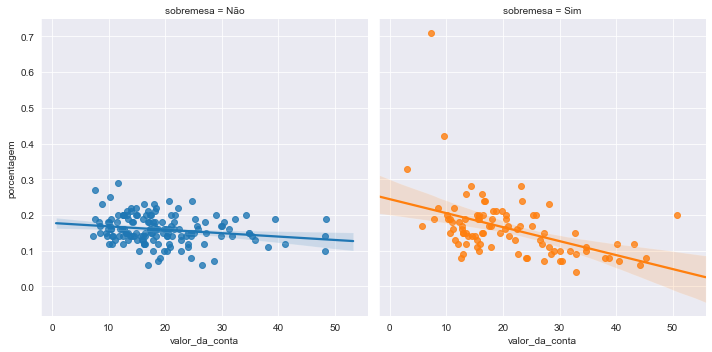

In [87]:
sns.lmplot(x='valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',data=gorjetas)

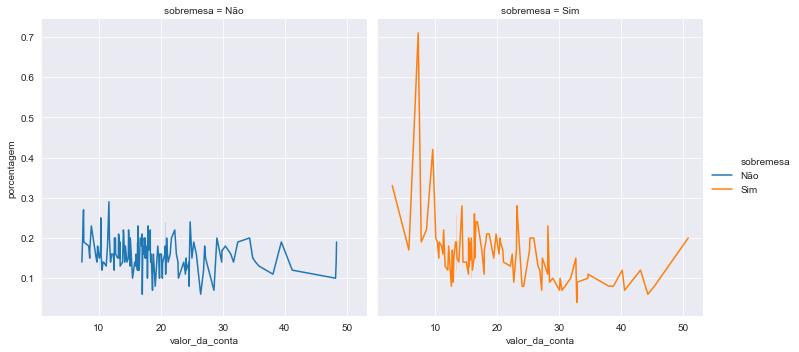

In [88]:
sns.relplot(x='valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',kind='line',data=gorjetas)

Tes de Hipótese

A distribuição da taxa de gorjeta é a mesma nos dois grupos

A distribuição da taxa de gorjeta não é a mesma nos dois grupos

In [89]:
from scipy.stats import ranksums

In [90]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [91]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [92]:
r= ranksums(sobremesa,sem_sobremesa)

In [93]:
print('O valor do p-value é {}/z'.format(r.pvalue))
print('Como o p-value ficou acima de 0,05, isso quer dizer que nao foi descartado a primeira hipotese')

O valor do p-value é 0.5266635660124415/z
Como o p-value ficou acima de 0,05, isso quer dizer que nao foi descartado a primeira hipotese


In [94]:
ranksums(sobremesa,sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)